In [381]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sklearn
from sklearn import preprocessing
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold

In [382]:
df_ns2=pd.read_csv('KiKNet_smoothFAS_updated_28Dec20_NS2.csv')
df_ew2=pd.read_csv('KiKNet_smoothFAS_updated_28Dec20_EW2.csv')

In [383]:
df_ew2

,Unnamed: 0,Unnamed: 0.1,X,Code,Address,Vs30,Z1,MT_Magnitude_,MT_Depth_,rrup_0,rrup_1,rjb_0,rjb_1,rhypo_0,rhypo_1,repi_0,repi_1,depth,Origin_day_,originDate,Origin_Time_,Longitude_,Latitude_,Region_Name_,samplingFreq,lon,lat,Tectonic_Garcia_,Tectonic_Zhoa_,JMA_Depth_,Focal_mechanism_kegan_,Strike_,recordDate,station Lon,station Lat,origin Time,Number_of_Stations_,Mo_,scale Factor,Dip_,direction,Ztor_0,Ztor_1,Focal_mechanism_Garcia_,Rake_,duration Time,mag,snr_EW1,snr_NS1,snr_EW2,snr_NS2,fLow_EW1,fLow_NS1,fLow_EW2,fLow_NS2,fHigh_EW1,fHigh_NS1,fHigh_EW2,fHigh_NS2,pga_EW1,pga_NS1,pga_EW2,pga_NS2,Ia_EW1,Ia_NS1,Ia_EW2,Ia_NS2,D5_75_EW1,D5_75_NS1,D5_75_EW2,D5_75_NS2,D5_75_sorted_EW1,D5_75_sorted_NS1,D5_75_sorted_EW2,D5_75_sorted_NS2,D20_80_EW1,D20_80_NS1,D20_80_EW2,D20_80_NS2,D5_95_EW1,D5_95_NS1,D5_95_EW2,D5_95_NS2,Vs5,Vs10,Vs20,Vs800,Vs50,Vs100,station,f_0.1,f_0.106,f_0.112,f_0.118,f_0.125,f_0.132,f_0.14,f_0.148,f_0.156,f_0.165,f_0.175,f_0.185,f_0.195,f_0.206,f_0.218,f_0.231,f_0.244,f_0.258,f_0.273,f_0.289,f_0.305,f_0.323,f_0.341,f_0.361,f_0.381,f_0.403,f_0.426,f_0.451,f_0.477,f_0.504,f_0.533,f_0.563,f_0.596,f_0.63,f_0.666,f_0.704,f_0.745,f_0.787,f_0.833,f_0.88,f_0.931,f_0.984,f_1.041,f_1.1,f_1.163,f_1.23,f_1.301,f_1.375,f_1.454,f_1.538,f_1.626,f_1.719,f_1.818,f_1.922,f_2.032,f_2.149,f_2.272,f_2.402,f_2.54,f_2.686,f_2.84,f_3.003,f_3.175,f_3.357,f_3.55,f_3.753,f_3.969,f_4.196,f_4.437,f_4.691,f_4.96,f_5.245,f_5.546,f_5.864,f_6.2,f_6.556,f_6.932,f_7.329,f_7.75,f_8.194,f_8.664,f_9.161,f_9.687,f_10.242,f_10.83,f_11.451,f_12.108,f_12.802,f_13.536,f_14.313,f_15.134,f_16.002,f_16.92,f_17.89,f_18.916,f_20.001,f_21.148,f_22.361,f_23.644,f_25.0
0,0,0,397,AICH049807010222,['/19980701022200/AICH049807010222'],241.153846,300.0,5.0,8,201.373906,200.978903,201.366205,200.963052,203.238108,203.238108,203.057130,203.057130,9,1998-07-01,1998-01-07 00:00:00,02:22:47.490000,137.9307,36.6148,NORTHERN_NAGANO_PREF,200,137.930,36.620,2,2,8.57,1,354;244,1998-01-07 00:00:00,137.0568,34.9319,02:22:00,3,3.790000e+16,0.000238,71;47,2,6.708929,7.145050,0,46;153,60,4.7,0.471818,0.471818,0.132381,0.132381,0.100000,0.100000,0.100000,0.100000,100.000000,100.000000,100.000000,100.000000,0.148,0.122,1.274,0.919,4.530000e-07,3.860000e-07,0.000040,0.000032,6.290,10.455,15.670,18.755,6.290,9.580,14.515,16.720,6.895,9.055,14.035,17.205,15.845,19.395,30.665,32.665,190.000000,190.000000,212.542373,434.368748,270.258621,318.514916,AICH04,3.290229e-05,5.482840e-05,1.476405e-04,1.543269e-04,1.139347e-04,7.935382e-05,1.031870e-04,0.000145,0.000154,0.000171,0.000255,0.000366,0.000452,0.000517,0.000484,0.000348,0.000284,0.000279,0.000386,0.000699,0.001003,0.001350,0.001589,0.001624,0.001692,0.002521,0.003835,0.003524,0.003024,0.004069,0.004688,0.004130,0.003517,0.003198,0.002944,0.002506,0.002410,0.002624,0.003444,0.003584,0.003345,0.004721,0.005261,0.004439,0.004880,0.006479,0.006718,0.005258,0.004153,0.003489,0.003283,0.004128,0.005461,0.005356,0.004298,0.003931,0.004783,0.006585,0.008958,0.007822,0.004982,0.004036,0.004063,0.003502,0.002500,0.002412,0.002654,0.002797,0.002902,0.002764,0.002484,0.002019,0.001404,0.001304,0.001652,0.001825,0.001416,0.000880,0.000631,0.000585,0.000622,0.000538,0.000462,0.000516,0.000529,0.000434,0.000337,0.000259,0.000189,0.000142,0.000119,0.000114,0.000114,0.000100,0.000087,0.000089,0.000105,0.000106,0.000078,0.000052
1,1,1,398,AICH059807010222,['/19980701022200/AICH059807010222'],301.324503,NaN,5.0,8,212.567233,212.181739,212.569993,212.177466,214.403284,214.403284,214.229938,214.229938,9,1998-07-01,1998-01-07 00:00:00,02:22:47.490000,137.9307,36.6148,NORTHERN_NAGANO_PREF,200,137.930,36.620,2,2,8.57,1,354;244,1998-01-07 00:00:00,136.8763,34.8886,02:22:00,3,3.790000e+16,0.000238,71;47,2,6.708929,7.145050,0,46;153,89,4.7,0.437456,0.437456,0.715524,0.715524,0.155640,0.155640,0.180054,0.180054,100.000000,100.000000,100.000000,100.000000,0.378,0.245,1.361,0.954,3.150000e-06,2.340000e-06,0.000033,0.000029,20.015,24.560,26.860,25.350,11.970,15.325,13.4

In [384]:
pd.set_option('display.max_columns', None)

In [385]:
print(df_ns2.columns.tolist())

['Unnamed: 0', 'Unnamed: 0.1', 'X', 'Code', 'Address', 'Vs30', 'Z1', 'MT_Magnitude_', 'MT_Depth_', 'rrup_0', 'rrup_1', 'rjb_0', 'rjb_1', 'rhypo_0', 'rhypo_1', 'repi_0', 'repi_1', 'depth', 'Origin_day_', 'originDate', 'Origin_Time_', 'Longitude_', 'Latitude_', 'Region_Name_', 'samplingFreq', 'lon', 'lat', 'Tectonic_Garcia_', 'Tectonic_Zhoa_', 'JMA_Depth_', 'Focal_mechanism_kegan_', 'Strike_', 'recordDate', 'station Lon', 'station Lat', 'origin Time', 'Number_of_Stations_', 'Mo_', 'scale Factor', 'Dip_', 'direction', 'Ztor_0', 'Ztor_1', 'Focal_mechanism_Garcia_', 'Rake_', 'duration Time', 'mag', 'snr_EW1', 'snr_NS1', 'snr_EW2', 'snr_NS2', 'fLow_EW1', 'fLow_NS1', 'fLow_EW2', 'fLow_NS2', 'fHigh_EW1', 'fHigh_NS1', 'fHigh_EW2', 'fHigh_NS2', 'pga_EW1', 'pga_NS1', 'pga_EW2', 'pga_NS2', 'Ia_EW1', 'Ia_NS1', 'Ia_EW2', 'Ia_NS2', 'D5_75_EW1', 'D5_75_NS1', 'D5_75_EW2', 'D5_75_NS2', 'D5_75_sorted_EW1', 'D5_75_sorted_NS1', 'D5_75_sorted_EW2', 'D5_75_sorted_NS2', 'D20_80_EW1', 'D20_80_NS1', 'D20_80_EW2

In [386]:
df=df_ns2[['MT_Magnitude_','rjb_0','Vs30','D5_75_NS2','D20_80_NS2','D5_95_NS2','D5_75_EW2','D20_80_EW2','D5_95_EW2']]


In [387]:
df

,MT_Magnitude_,rjb_0,Vs30,D5_75_NS2,D20_80_NS2,D5_95_NS2,D5_75_EW2,D20_80_EW2,D5_95_EW2
0,5.0,201.366205,241.153846,18.755,17.205,32.665,15.670,14.035,30.665
1,5.0,212.569993,301.324503,25.350,11.890,39.275,26.860,12.985,41.555
2,5.0,160.594546,428.100722,19.135,5.295,25.105,4.320,3.665,9.920
3,5.0,195.256405,448.533640,26.155,6.425,33.085,15.705,4.245,21.410
4,5.0,220.505360,274.027568,31.625,10.610,43.535,28.405,11.245,42.955
...,...,...,...,...,...,...,...,...,...
59006,3.6,48.584792,371.462264,4.490,3.750,13.260,3.460,1.760,9.290
59007,3.6,70.884798,328.979157,5.600,6.870,17.760,6.520,6.360,19.840
59008,3.6,52.028046,343.678161,4.810,5.460,15.090,5.640,6.250,18.750
59009,3.6,34.276865,573.596358,2.530,2.600,8.140,3.940,4.190,11.120


In [388]:
from scipy import stats 

In [389]:
df['_5_75']=stats.gmean(df.loc[:,['D5_75_EW2','D5_75_NS2']], axis=1)
df['_20_80']=stats.gmean(df.loc[:,['D20_80_EW2','D20_80_NS2']], axis=1)
df['_5_95']=stats.gmean(df.loc[:,['D5_95_EW2','D5_95_NS2']], axis=1)

C:\Users\Dev\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dev\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dev\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [390]:
df

,MT_Magnitude_,rjb_0,Vs30,D5_75_NS2,D20_80_NS2,D5_95_NS2,D5_75_EW2,D20_80_EW2,D5_95_EW2,_5_75,_20_80,_5_95
0,5.0,201.366205,241.153846,18.755,17.205,32.665,15.670,14.035,30.665,17.143245,15.539375,31.649206
1,5.0,212.569993,301.324503,25.350,11.890,39.275,26.860,12.985,41.555,26.094080,12.425444,40.398919
2,5.0,160.594546,428.100722,19.135,5.295,25.105,4.320,3.665,9.920,9.091930,4.405244,15.781052
3,5.0,195.256405,448.533640,26.155,6.425,33.085,15.705,4.245,21.410,20.267320,5.222463,26.614843
4,5.0,220.505360,274.027568,31.625,10.610,43.535,28.405,11.245,42.955,29.971789,10.922887,43.244028
...,...,...,...,...,...,...,...,...,...,...,...,...
59006,3.6,48.584792,371.462264,4.490,3.750,13.260,3.460,1.760,9.290,3.941497,2.569047,11.098892
59007,3.6,70.884798,328.979157,5.600,6.870,17.760,6.520,6.360,19.840,6.042516,6.610083,18.771212
59008,3.6,52.028046,343.678161,4.810,5.460,15.090,5.640,6.250,18.750,5.208493,5.841661,16.820746
59009,3.6,34.276865,573.596358,2.530,2.600,8.140,3.940,4.190,11.120,3.157246,3.300606,9.514032


In [391]:
df=df.reset_index()
df.shape

(59011, 13)

In [392]:
df.dropna(axis=0,inplace=True)

In [393]:
df.isnull().any()

index            False
MT_Magnitude_    False
rjb_0            False
Vs30             False
D5_75_NS2        False
D20_80_NS2       False
D5_95_NS2        False
D5_75_EW2        False
D20_80_EW2       False
D5_95_EW2        False
_5_75            False
_20_80           False
_5_95            False
dtype: bool

In [394]:
df['Vs30'].max()

2100.0

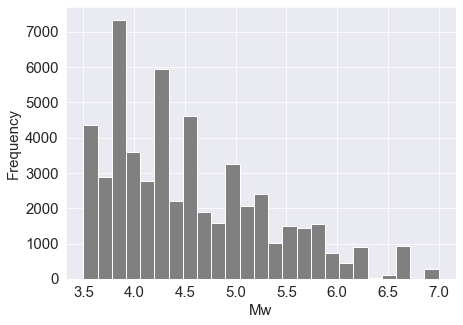

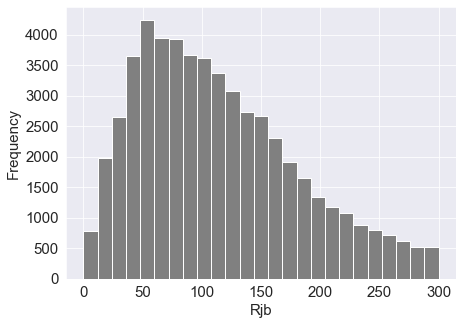

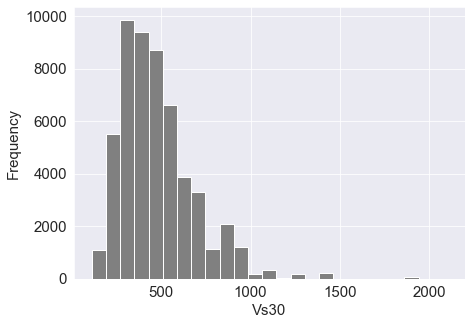

In [395]:
plt.figure(figsize=(7,5))

plt.hist(df['MT_Magnitude_'], bins=25, color='grey')
plt.xlabel('Mw',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.figure(figsize=(7,5))

plt.hist(df['rjb_0'], bins=25, color='grey')
plt.xlabel('Rjb',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.figure(figsize=(7,5))

plt.hist(df['Vs30'], bins=25, color='grey')
plt.xlabel('Vs30',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)



Text(0.5, 1.0, 'Duration 20_80_')

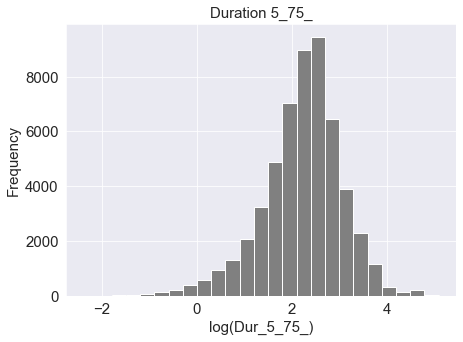

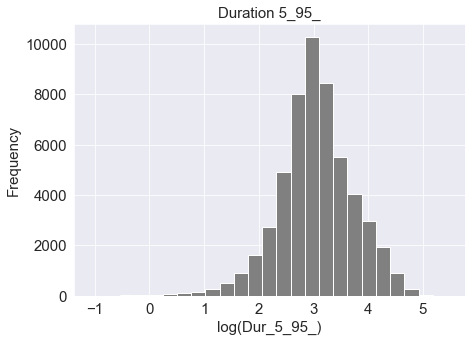

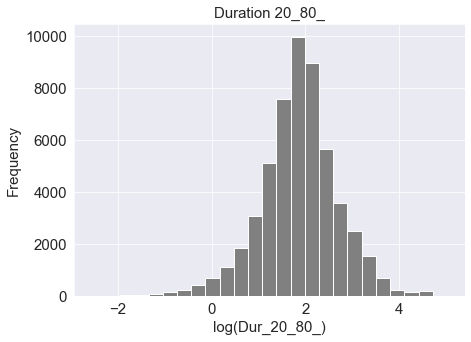

In [333]:
plt.figure(figsize=(7,5))

plt.hist(np.log(df['_5_75']), bins=25, color='grey')

plt.xlabel('log(Dur_5_75_)',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Duration 5_75_', fontsize=15)

plt.figure(figsize=(7,5))

plt.hist(np.log(df['_5_95']), bins=25, color='grey')

plt.xlabel('log(Dur_5_95_)',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Duration 5_95_', fontsize=15)

plt.figure(figsize=(7,5))

plt.hist(np.log(df['_20_80']), bins=25, color='grey')

plt.xlabel('log(Dur_20_80_)',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Duration 20_80_', fontsize=15)

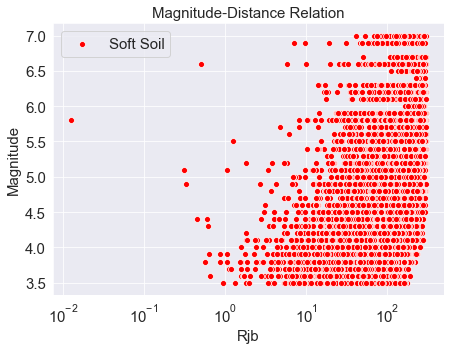

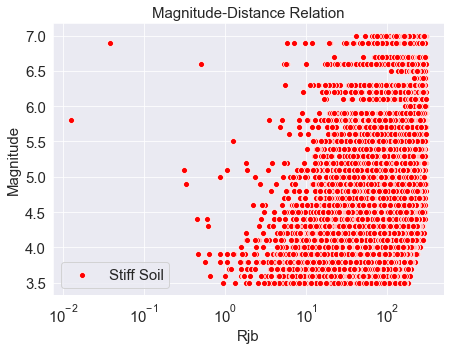

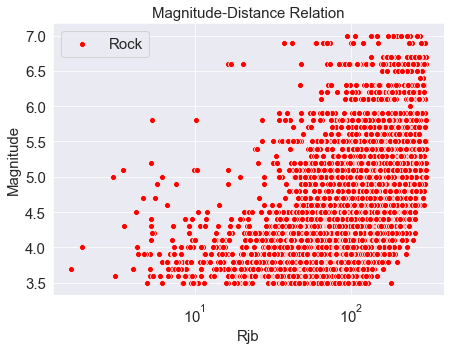

In [334]:
mag=df.loc[(df['Vs30'] >= 200, 'MT_Magnitude_' ) and(df['Vs30'] <= 400, 'MT_Magnitude_' ) ]
dis=df.loc[(df['Vs30'] >= 200, 'rjb_0' ) and(df['Vs30'] <= 400, 'rjb_0' ) ]

plt.figure(figsize=(7,5))
sns.scatterplot(dis,mag,color='red', label='Soft Soil')
plt.xscale('log')

plt.xlabel('Rjb' ,fontsize=15)
plt.ylabel('Magnitude', fontsize=15)
plt.title('Magnitude-Distance Relation', fontsize=15)
plt.legend(fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)

mag=df.loc[(df['Vs30'] > 400, 'MT_Magnitude_' ) and(df['Vs30'] <= 800, 'MT_Magnitude_' ) ]
dis=df.loc[(df['Vs30'] > 400, 'rjb_0' ) and(df['Vs30'] <= 800, 'rjb_0' ) ]

plt.figure(figsize=(7,5))
sns.scatterplot(dis,mag,color='red', label='Stiff Soil')
plt.xscale('log')

plt.xlabel('Rjb' ,fontsize=15)
plt.ylabel('Magnitude', fontsize=15)
plt.title('Magnitude-Distance Relation', fontsize=15)
plt.legend(fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)


mag=df.loc[(df['Vs30'] > 800, 'MT_Magnitude_' ) ]
dis=df.loc[(df['Vs30'] > 800, 'rjb_0' )  ]

plt.figure(figsize=(7,5))
sns.scatterplot(dis,mag,color='red', label='Rock')
plt.xscale('log')

plt.xlabel('Rjb' ,fontsize=15)
plt.ylabel('Magnitude', fontsize=15)
plt.title('Magnitude-Distance Relation', fontsize=15)
plt.legend(fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)

In [335]:
a1=df[(df.rjb_0 >= 30 )&(df.rjb_0 <= 100 )]._5_75 
b1=df[(df.rjb_0 >= 30 )&(df.rjb_0 <= 100 )].MT_Magnitude_
a2=df[(df.rjb_0 > 100 )&(df.rjb_0 <= 200 )]._5_75 
b2=df[(df.rjb_0 > 100 )&(df.rjb_0 <= 200 )].MT_Magnitude_
a3=df[(df.rjb_0 > 200 )&(df.rjb_0 <= 300 )]._5_75 
b3=df[(df.rjb_0 > 200 )&(df.rjb_0 <= 300 )].MT_Magnitude_

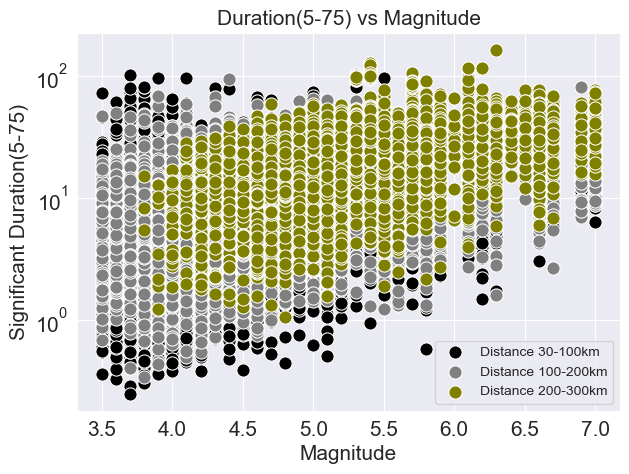

In [336]:


plt.figure(figsize=(7,5),dpi=100)
sns.scatterplot(b1,(a1),color='black',s=90,label='Distance 30-100km', marker="o" )
sns.scatterplot(b2,(a2),color='grey',s=90, label='Distance 100-200km' ,marker='o')
sns.scatterplot(b3,(a3),color='olive',s=90, label='Distance 200-300km', marker="o" )
plt.yscale('log')
plt.legend(fontsize=10)
#plt.ylim([0,20])

plt.ylabel('Significant Duration(5-75)' ,fontsize=15)
plt.xlabel('Magnitude', fontsize=15)
plt.title('Duration(5-75) vs Magnitude', fontsize=15)

plt.tick_params(axis='both', which='major', labelsize=15)

In [337]:
a1=df[(df.rjb_0 >= 30 )&(df.rjb_0 <= 100 )]._5_95 
b1=df[(df.rjb_0 >= 30 )&(df.rjb_0 <= 100 )].MT_Magnitude_
a2=df[(df.rjb_0 > 100 )&(df.rjb_0 <= 200 )]._5_95 
b2=df[(df.rjb_0 > 100 )&(df.rjb_0 <= 200 )].MT_Magnitude_
a3=df[(df.rjb_0 > 200 )&(df.rjb_0 <= 300 )]._5_95 
b3=df[(df.rjb_0 > 200 )&(df.rjb_0 <= 300 )].MT_Magnitude_

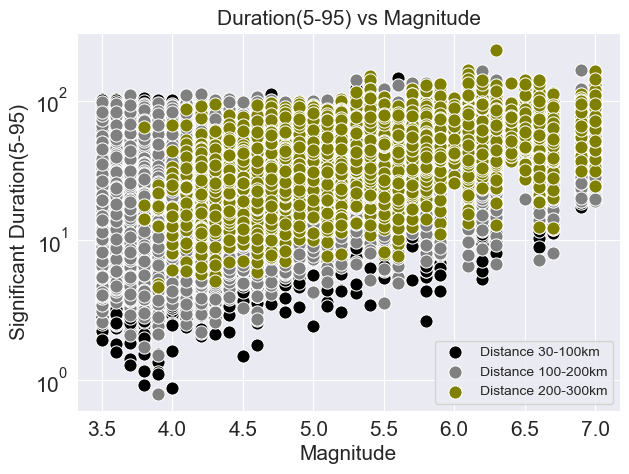

In [338]:


plt.figure(figsize=(7,5),dpi=100)
sns.scatterplot(b1,(a1),color='black',s=90,label='Distance 30-100km', marker="o" )
sns.scatterplot(b2,(a2),color='grey',s=90, label='Distance 100-200km' ,marker='o')
sns.scatterplot(b3,(a3),color='olive',s=90, label='Distance 200-300km', marker="o" )
plt.yscale('log')
plt.legend(fontsize=10)
#plt.ylim([0,20])

plt.ylabel('Significant Duration(5-95)' ,fontsize=15)
plt.xlabel('Magnitude', fontsize=15)
plt.title('Duration(5-95) vs Magnitude', fontsize=15)

plt.tick_params(axis='both', which='major', labelsize=15)

In [339]:
a1=df[(df.rjb_0 >= 30 )&(df.rjb_0 <= 100 )]._20_80 
b1=df[(df.rjb_0 >= 30 )&(df.rjb_0 <= 100 )].MT_Magnitude_
a2=df[(df.rjb_0 > 100 )&(df.rjb_0 <= 200 )]._20_80 
b2=df[(df.rjb_0 > 100 )&(df.rjb_0 <= 200 )].MT_Magnitude_
a3=df[(df.rjb_0 > 200 )&(df.rjb_0 <= 300 )]._20_80 
b3=df[(df.rjb_0 > 200 )&(df.rjb_0 <= 300 )].MT_Magnitude_

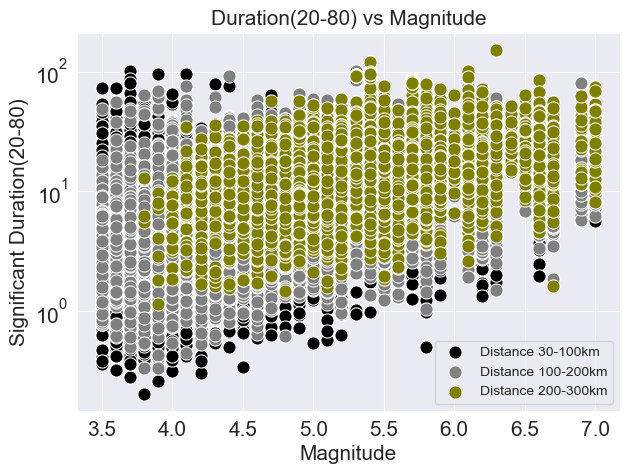

In [340]:


plt.figure(figsize=(7,5),dpi=100)
sns.scatterplot(b1,(a1),color='black',s=90,label='Distance 30-100km', marker="o" )
sns.scatterplot(b2,(a2),color='grey',s=90, label='Distance 100-200km' ,marker='o')
sns.scatterplot(b3,(a3),color='olive',s=90, label='Distance 200-300km', marker="o" )
plt.yscale('log')
plt.legend(fontsize=10)
#plt.ylim([0,20])

plt.ylabel('Significant Duration(20-80)' ,fontsize=15)
plt.xlabel('Magnitude', fontsize=15)
plt.title('Duration(20-80) vs Magnitude', fontsize=15)

plt.tick_params(axis='both', which='major', labelsize=15)

In [341]:
a1=df[(df.MT_Magnitude_ >= 4 )&(df.MT_Magnitude_ <= 5 )]._5_75 
b1=df[(df.MT_Magnitude_ >= 4 )&(df.MT_Magnitude_ <= 5 )].rjb_0
a2=df[(df.MT_Magnitude_ > 5 )&(df.MT_Magnitude_ <= 6 )]._5_75 
b2=df[(df.MT_Magnitude_ > 5 )&(df.MT_Magnitude_ <= 6 )].rjb_0
a3=df[(df.MT_Magnitude_ > 6 )&(df.MT_Magnitude_ <= 7 )]._5_75 
b3=df[(df.MT_Magnitude_ > 6 )&(df.MT_Magnitude_ <= 7 )].rjb_0
a4=df[(df.MT_Magnitude_ > 7 )&(df.MT_Magnitude_ <= 8 )]._5_75 
b4=df[(df.MT_Magnitude_ > 7 )&(df.MT_Magnitude_ <= 8 )].rjb_0
a5=df[(df.MT_Magnitude_ > 8 )]._5_75 
b5=df[(df.MT_Magnitude_ > 8 )].rjb_0

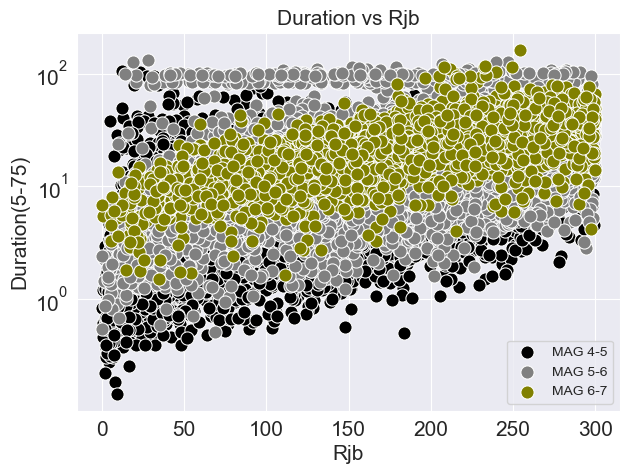

In [342]:


plt.figure(figsize=(7,5),dpi=100)
sns.scatterplot(b1,(a1),color='black',s=90,label='MAG 4-5', marker="o" )
sns.scatterplot(b2,(a2),color='grey',s=90, label='MAG 5-6' ,marker='o')
sns.scatterplot(b3,(a3),color='olive',s=90, label='MAG 6-7', marker="o" )
sns.scatterplot(b4,(a4),color='lightgreen',s=90, label='MAG 7-8', marker="o" )
sns.scatterplot(b5,(a5),color='palevioletred',s=90, label='MAG >8', marker="o" )
plt.yscale('log')
plt.legend(fontsize=10)
#plt.ylim([0,20])

plt.ylabel('Duration(5-75)' ,fontsize=15)
plt.xlabel('Rjb', fontsize=15)
plt.title('Duration vs Rjb', fontsize=15)

plt.tick_params(axis='both', which='major', labelsize=15)

In [343]:
a1=df[(df.MT_Magnitude_ >= 4 )&(df.MT_Magnitude_ <= 5 )]._5_95 
b1=df[(df.MT_Magnitude_ >= 4 )&(df.MT_Magnitude_ <= 5 )].rjb_0
a2=df[(df.MT_Magnitude_ > 5 )&(df.MT_Magnitude_ <= 6 )]._5_95 
b2=df[(df.MT_Magnitude_ > 5 )&(df.MT_Magnitude_ <= 6 )].rjb_0
a3=df[(df.MT_Magnitude_ > 6 )&(df.MT_Magnitude_ <= 7 )]._5_95 
b3=df[(df.MT_Magnitude_ > 6 )&(df.MT_Magnitude_ <= 7 )].rjb_0
a4=df[(df.MT_Magnitude_ > 7 )&(df.MT_Magnitude_ <= 8 )]._5_95 
b4=df[(df.MT_Magnitude_ > 7 )&(df.MT_Magnitude_ <= 8 )].rjb_0
a5=df[(df.MT_Magnitude_ > 8 )]._5_95 
b5=df[(df.MT_Magnitude_ > 8 )].rjb_0

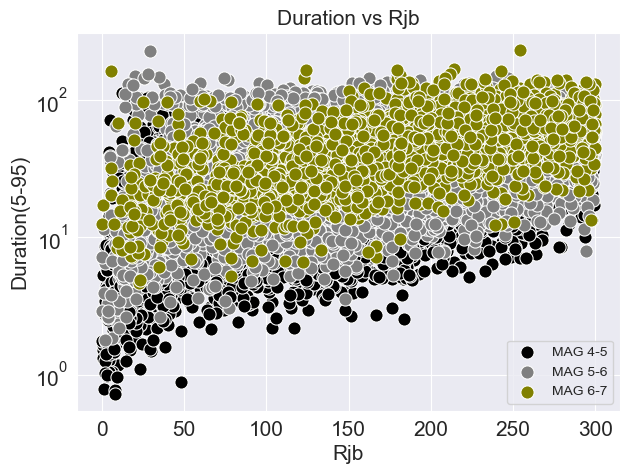

In [344]:


plt.figure(figsize=(7,5),dpi=100)
sns.scatterplot(b1,(a1),color='black',s=90,label='MAG 4-5', marker="o" )
sns.scatterplot(b2,(a2),color='grey',s=90, label='MAG 5-6' ,marker='o')
sns.scatterplot(b3,(a3),color='olive',s=90, label='MAG 6-7', marker="o" )
sns.scatterplot(b4,(a4),color='lightgreen',s=90, label='MAG 7-8', marker="o" )
sns.scatterplot(b5,(a5),color='palevioletred',s=90, label='MAG >8', marker="o" )
plt.yscale('log')
plt.legend(fontsize=10)
#plt.ylim([0,20])

plt.ylabel('Duration(5-95)' ,fontsize=15)
plt.xlabel('Rjb', fontsize=15)
plt.title('Duration vs Rjb', fontsize=15)

plt.tick_params(axis='both', which='major', labelsize=15)

In [345]:
a1=df[(df.MT_Magnitude_ >= 4 )&(df.MT_Magnitude_ <= 5 )]._20_80
b1=df[(df.MT_Magnitude_ >= 4 )&(df.MT_Magnitude_ <= 5 )].rjb_0
a2=df[(df.MT_Magnitude_ > 5 )&(df.MT_Magnitude_ <= 6 )]._20_80 
b2=df[(df.MT_Magnitude_ > 5 )&(df.MT_Magnitude_ <= 6 )].rjb_0
a3=df[(df.MT_Magnitude_ > 6 )&(df.MT_Magnitude_ <= 7 )]._20_80
b3=df[(df.MT_Magnitude_ > 6 )&(df.MT_Magnitude_ <= 7 )].rjb_0
a4=df[(df.MT_Magnitude_ > 7 )&(df.MT_Magnitude_ <= 8 )]._20_80
b4=df[(df.MT_Magnitude_ > 7 )&(df.MT_Magnitude_ <= 8 )].rjb_0
a5=df[(df.MT_Magnitude_ > 8 )]._20_80 
b5=df[(df.MT_Magnitude_ > 8 )].rjb_0

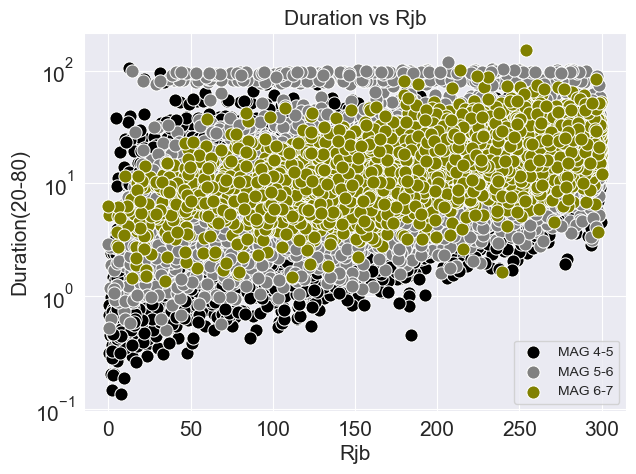

In [346]:


plt.figure(figsize=(7,5),dpi=100)
sns.scatterplot(b1,(a1),color='black',s=90,label='MAG 4-5', marker="o" )
sns.scatterplot(b2,(a2),color='grey',s=90, label='MAG 5-6' ,marker='o')
sns.scatterplot(b3,(a3),color='olive',s=90, label='MAG 6-7', marker="o" )
sns.scatterplot(b4,(a4),color='lightgreen',s=90, label='MAG 7-8', marker="o" )
sns.scatterplot(b5,(a5),color='palevioletred',s=90, label='MAG >8', marker="o" )
plt.yscale('log')
plt.legend(fontsize=10)
#plt.ylim([0,20])

plt.ylabel('Duration(20-80)' ,fontsize=15)
plt.xlabel('Rjb', fontsize=15)
plt.title('Duration vs Rjb', fontsize=15)

plt.tick_params(axis='both', which='major', labelsize=15)

In [347]:
a1=df[(df.MT_Magnitude_ >= 4 )&(df.MT_Magnitude_ <= 5 )]._5_75 
b1=df[(df.MT_Magnitude_ >= 4 )&(df.MT_Magnitude_ <= 5 )].Vs30
a2=df[(df.MT_Magnitude_ > 5 )&(df.MT_Magnitude_ <= 6 )]._5_75 
b2=df[(df.MT_Magnitude_ > 5 )&(df.MT_Magnitude_ <= 6 )].Vs30
a3=df[(df.MT_Magnitude_ > 6 )&(df.MT_Magnitude_ <= 7 )]._5_75 
b3=df[(df.MT_Magnitude_ > 6 )&(df.MT_Magnitude_ <= 7 )].Vs30
a4=df[(df.MT_Magnitude_ > 7 )&(df.MT_Magnitude_ <= 8 )]._5_75 
b4=df[(df.MT_Magnitude_ > 7 )&(df.MT_Magnitude_ <= 8 )].Vs30
a5=df[(df.MT_Magnitude_ > 8 )]._5_75 
b5=df[(df.MT_Magnitude_ > 8 )].Vs30

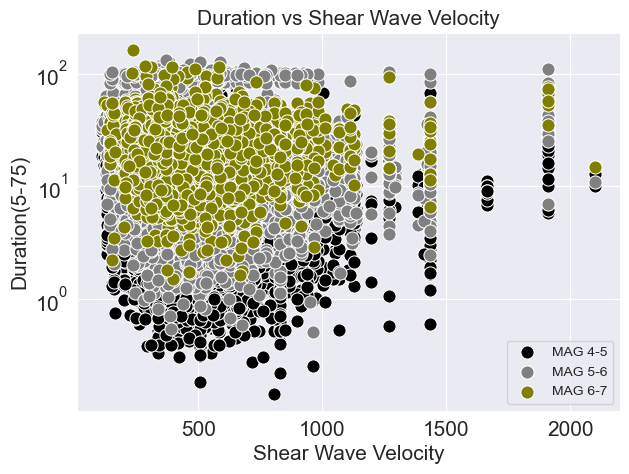

In [348]:


plt.figure(figsize=(7,5),dpi=100)
sns.scatterplot(b1,(a1),color='black',s=90,label='MAG 4-5', marker="o" )
sns.scatterplot(b2,(a2),color='grey',s=90, label='MAG 5-6' ,marker='o')
sns.scatterplot(b3,(a3),color='olive',s=90, label='MAG 6-7', marker="o" )
sns.scatterplot(b4,(a4),color='lightgreen',s=90, label='MAG 7-8', marker="o" )
sns.scatterplot(b5,(a5),color='palevioletred',s=90, label='MAG >8', marker="o" )
plt.yscale('log')
plt.legend(fontsize=10)
#plt.ylim([0,.05])

plt.ylabel('Duration(5-75)' ,fontsize=15)
plt.xlabel('Shear Wave Velocity', fontsize=15)
plt.title('Duration vs Shear Wave Velocity', fontsize=15)

plt.tick_params(axis='both', which='major', labelsize=15)

In [349]:
a1=df[(df.MT_Magnitude_ >= 4 )&(df.MT_Magnitude_ <= 5 )]._5_95 
b1=df[(df.MT_Magnitude_ >= 4 )&(df.MT_Magnitude_ <= 5 )].Vs30
a2=df[(df.MT_Magnitude_ > 5 )&(df.MT_Magnitude_ <= 6 )]._5_95 
b2=df[(df.MT_Magnitude_ > 5 )&(df.MT_Magnitude_ <= 6 )].Vs30
a3=df[(df.MT_Magnitude_ > 6 )&(df.MT_Magnitude_ <= 7 )]._5_95 
b3=df[(df.MT_Magnitude_ > 6 )&(df.MT_Magnitude_ <= 7 )].Vs30
a4=df[(df.MT_Magnitude_ > 7 )&(df.MT_Magnitude_ <= 8 )]._5_95 
b4=df[(df.MT_Magnitude_ > 7 )&(df.MT_Magnitude_ <= 8 )].Vs30
a5=df[(df.MT_Magnitude_ > 8 )]._5_95 
b5=df[(df.MT_Magnitude_ > 8 )].Vs30

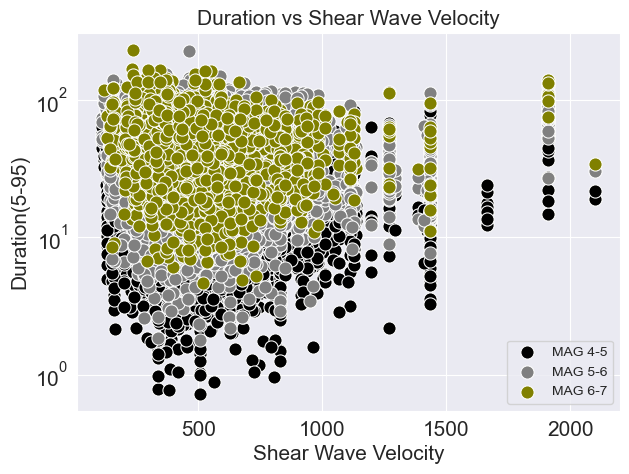

In [350]:


plt.figure(figsize=(7,5),dpi=100)
sns.scatterplot(b1,(a1),color='black',s=90,label='MAG 4-5', marker="o" )
sns.scatterplot(b2,(a2),color='grey',s=90, label='MAG 5-6' ,marker='o')
sns.scatterplot(b3,(a3),color='olive',s=90, label='MAG 6-7', marker="o" )
sns.scatterplot(b4,(a4),color='lightgreen',s=90, label='MAG 7-8', marker="o" )
sns.scatterplot(b5,(a5),color='palevioletred',s=90, label='MAG >8', marker="o" )
plt.yscale('log')
plt.legend(fontsize=10)
#plt.ylim([0,.05])

plt.ylabel('Duration(5-95)' ,fontsize=15)
plt.xlabel('Shear Wave Velocity', fontsize=15)
plt.title('Duration vs Shear Wave Velocity', fontsize=15)

plt.tick_params(axis='both', which='major', labelsize=15)

In [351]:
a1=df[(df.MT_Magnitude_ >= 4 )&(df.MT_Magnitude_ <= 5 )]._20_80 
b1=df[(df.MT_Magnitude_ >= 4 )&(df.MT_Magnitude_ <= 5 )].Vs30
a2=df[(df.MT_Magnitude_ > 5 )&(df.MT_Magnitude_ <= 6 )]._20_80 
b2=df[(df.MT_Magnitude_ > 5 )&(df.MT_Magnitude_ <= 6 )].Vs30
a3=df[(df.MT_Magnitude_ > 6 )&(df.MT_Magnitude_ <= 7 )]._20_80 
b3=df[(df.MT_Magnitude_ > 6 )&(df.MT_Magnitude_ <= 7 )].Vs30
a4=df[(df.MT_Magnitude_ > 7 )&(df.MT_Magnitude_ <= 8 )]._20_80 
b4=df[(df.MT_Magnitude_ > 7 )&(df.MT_Magnitude_ <= 8 )].Vs30
a5=df[(df.MT_Magnitude_ > 8 )]._20_80 
b5=df[(df.MT_Magnitude_ > 8 )].Vs30

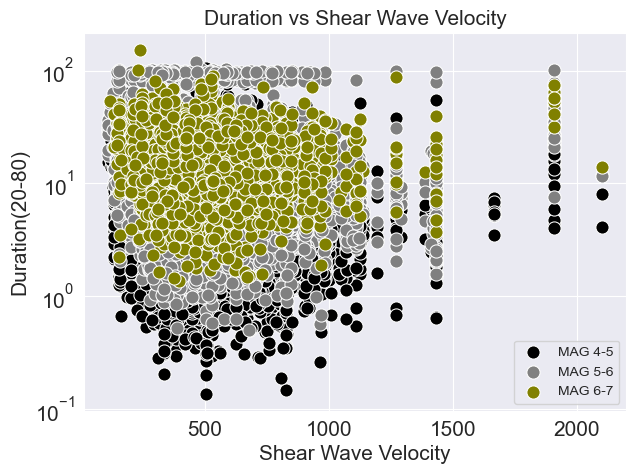

In [352]:


plt.figure(figsize=(7,5),dpi=100)
sns.scatterplot(b1,(a1),color='black',s=90,label='MAG 4-5', marker="o" )
sns.scatterplot(b2,(a2),color='grey',s=90, label='MAG 5-6' ,marker='o')
sns.scatterplot(b3,(a3),color='olive',s=90, label='MAG 6-7', marker="o" )
sns.scatterplot(b4,(a4),color='lightgreen',s=90, label='MAG 7-8', marker="o" )
sns.scatterplot(b5,(a5),color='palevioletred',s=90, label='MAG >8', marker="o" )
plt.yscale('log')
plt.legend(fontsize=10)
#plt.ylim([0,.05])

plt.ylabel('Duration(20-80)' ,fontsize=15)
plt.xlabel('Shear Wave Velocity', fontsize=15)
plt.title('Duration vs Shear Wave Velocity', fontsize=15)

plt.tick_params(axis='both', which='major', labelsize=15)

# Model Building

In [353]:
df.columns

Index(['index', 'MT_Magnitude_', 'rjb_0', 'Vs30', 'D5_75_NS2', 'D20_80_NS2',
       'D5_95_NS2', 'D5_75_EW2', 'D20_80_EW2', 'D5_95_EW2', '_5_75', '_20_80',
       '_5_95'],
      dtype='object')

In [354]:
input_var=df[['MT_Magnitude_','rjb_0','Vs30']]

In [355]:
y_var=df[['_5_95']]
y_var=np.log(y_var)
y_var=np.array(y_var)
y_var

array([[3.45471305],
       [3.69880302],
       [2.75880998],
       ...,
       [2.82261301],
       [2.25276773],
       [2.77567799]])

In [356]:
X_train, X_test, y_train, y_test=train_test_split(input_var,y_var,test_size=0.1)

In [357]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(48417, 3)
(5380, 3)
(48417, 1)
(5380, 1)


In [358]:
X_train=preprocessing.scale(X_train)
X_test=preprocessing.scale(X_test)

In [359]:
X_train

array([[-0.17549386,  1.64977736,  0.86850442],
       [-1.21547256, -0.79273912, -1.5730876 ],
       [-0.43548853,  0.96203298, -0.50330637],
       ...,
       [ 1.51447154,  1.31426101,  1.65202784],
       [ 2.68444758,  1.63780058,  1.36458042],
       [ 1.3844742 , -1.26634814, -0.53414979]])

In [360]:
from tensorflow.keras.optimizers import Adam

In [361]:
model=Sequential([Dense(units=10, input_shape=(3,), activation='tanh'),
                  Dense(units=10, activation='tanh'),
                  
                  Dense(units=1, activation='linear')
                 ])

In [362]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 10)                40        
_________________________________________________________________
dense_29 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 11        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [363]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='mean_squared_error')

Train on 43575 samples, validate on 4842 samples
Epoch 1/200
43575/43575 [==============================] - 1s 17us/step - loss: 0.6351 - val_loss: 0.2719
Epoch 2/200
43575/43575 [==============================] - 1s 16us/step - loss: 0.2735 - val_loss: 0.2612
Epoch 3/200
43575/43575 [==============================] - 1s 14us/step - loss: 0.2669 - val_loss: 0.2719
Epoch 4/200
43575/43575 [==============================] - 1s 15us/step - loss: 0.2659 - val_loss: 0.2541
Epoch 5/200
43575/43575 [==============================] - 1s 13us/step - loss: 0.2643 - val_loss: 0.2540
Epoch 6/200
43575/43575 [==============================] - 1s 13us/step - loss: 0.2647 - val_loss: 0.2821
Epoch 7/200
43575/43575 [==============================] - 1s 13us/step - loss: 0.2641 - val_loss: 0.2558
Epoch 8/200
43575/43575 [==============================] - 1s 12us/step - loss: 0.2646 - val_loss: 0.2581
Epoch 9/200
43575/43575 [==============================] - 1s 13us/step - loss: 0.2631 - val_loss: 0.25

43575/43575 [==============================] - 1s 12us/step - loss: 0.2605 - val_loss: 0.2517
Epoch 78/200
43575/43575 [==============================] - 1s 12us/step - loss: 0.2598 - val_loss: 0.2546
Epoch 79/200
43575/43575 [==============================] - 1s 13us/step - loss: 0.2594 - val_loss: 0.2523
Epoch 80/200
43575/43575 [==============================] - 1s 12us/step - loss: 0.2593 - val_loss: 0.2533
Epoch 81/200
43575/43575 [==============================] - ETA: 0s - loss: 0.258 - 1s 12us/step - loss: 0.2594 - val_loss: 0.2532
Epoch 82/200
43575/43575 [==============================] - 1s 12us/step - loss: 0.2590 - val_loss: 0.2565
Epoch 83/200
43575/43575 [==============================] - 1s 12us/step - loss: 0.2598 - val_loss: 0.2517
Epoch 84/200
43575/43575 [==============================] - 1s 12us/step - loss: 0.2604 - val_loss: 0.2555
Epoch 85/200
43575/43575 [==============================] - 1s 12us/step - loss: 0.2589 - val_loss: 0.2532
Epoch 86/200
43575/43575 [

Epoch 153/200
43575/43575 [==============================] - 1s 12us/step - loss: 0.2579 - val_loss: 0.2528
Epoch 154/200
43575/43575 [==============================] - 1s 12us/step - loss: 0.2583 - val_loss: 0.2531
Epoch 155/200
43575/43575 [==============================] - 1s 12us/step - loss: 0.2594 - val_loss: 0.2637
Epoch 156/200
43575/43575 [==============================] - 1s 12us/step - loss: 0.2587 - val_loss: 0.2520
Epoch 157/200
43575/43575 [==============================] - 1s 13us/step - loss: 0.2588 - val_loss: 0.2507
Epoch 158/200
43575/43575 [==============================] - 1s 12us/step - loss: 0.2583 - val_loss: 0.2521
Epoch 159/200
43575/43575 [==============================] - 1s 12us/step - loss: 0.2581 - val_loss: 0.2519
Epoch 160/200
43575/43575 [==============================] - 1s 12us/step - loss: 0.2596 - val_loss: 0.2518
Epoch 161/200
43575/43575 [==============================] - 1s 12us/step - loss: 0.2588 - val_loss: 0.2508
Epoch 162/200
43575/43575 [=

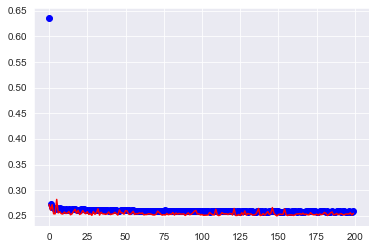

In [364]:
history=model.fit(X_train, y_train,batch_size=128, epochs=200, validation_split=0.1, verbose=1)
history_dict=history.history
    
loss_values= history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
    
plt.plot(loss_values, 'bo', label='training loss')
plt.plot(val_loss_values, 'r', label='val training loss')

In [365]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

print('R2 score on train set is :\t{:0.3f}'.format(r2_score(y_train, y_train_pred)))
print('R2 score on test set is :\t{:0.3f}'.format(r2_score(y_test, y_test_pred)))

R2 score on train set is :	0.436
R2 score on test set is :	0.446


In [366]:
print(y_test)
print(y_test_pred)


[[3.193894  ]
 [3.01085137]
 [4.03928474]
 ...
 [3.8060714 ]
 [3.54733244]
 [2.89358778]]
[[3.2936804]
 [3.043764 ]
 [4.17925  ]
 ...
 [3.4405613]
 [3.5896642]
 [3.1022303]]


Text(0, 0.5, 'count')

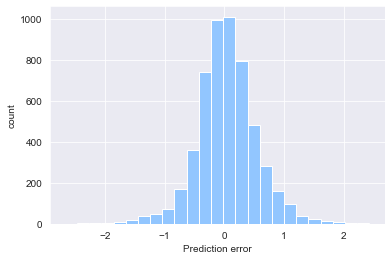

In [367]:
error=y_test_pred-y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction error')
plt.ylabel('count')

<Figure size 432x288 with 0 Axes>

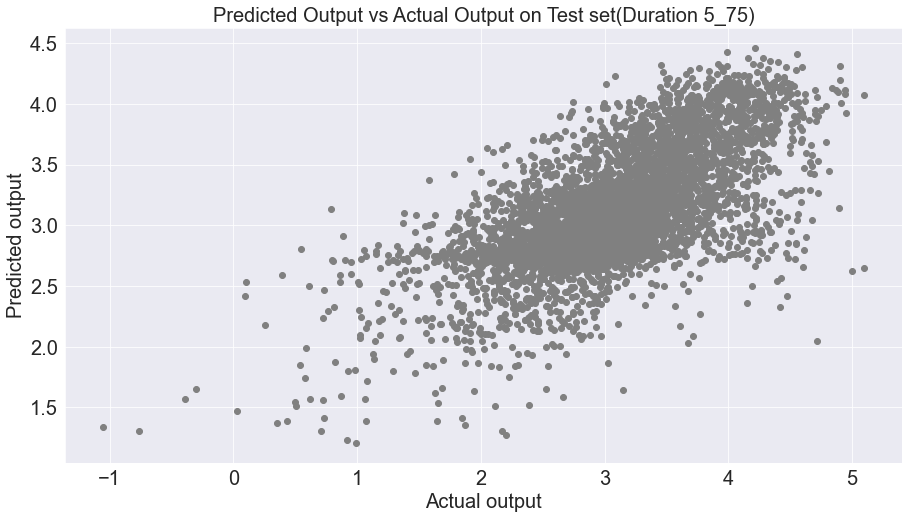

<Figure size 432x288 with 0 Axes>

In [368]:
plt.figure(figsize=(15,8))
plt.plot(y_test, y_test_pred, 'o', color='grey')
plt.xlabel('Actual output',fontsize=20)
plt.ylabel('Predicted output',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Predicted Output vs Actual Output on Test set(Duration 5_75)', fontsize=20)

plt.figure()


In [369]:
X_data=np.array(preprocessing.scale(input_var))
X_data

array([[ 0.60218713,  1.30029062, -1.11629738],
       [ 0.60218713,  1.46695887, -0.83380391],
       [ 0.60218713,  0.69376887, -0.23860593],
       ...,
       [-1.21555841, -0.9212732 , -0.63495896],
       [-1.21555841, -1.18534087,  0.44447729],
       [-1.21555841, -0.95412353, -1.24754661]])

In [370]:
y_pred=model.predict(X_data)
y_pred

array([[3.7768106],
       [3.7791526],
       [3.3771873],
       ...,
       [2.7072666],
       [2.547784 ],
       [3.007791 ]], dtype=float32)

In [371]:
output_y=df[['_5_95']]
output_y=np.log(output_y)
output_y

,_5_95
0,3.454713
1,3.698803
2,2.758810
3,3.281469
4,3.766859
...,...
59006,2.406845
59007,2.932324
59008,2.822613
59009,2.252768


In [372]:
residual=output_y-y_pred
residual

,_5_95
0,-0.322098
1,-0.080350
2,-0.618377
3,-0.256445
4,-0.052042
...,...
59006,-0.279306
59007,0.155463
59008,0.115346
59009,-0.295016


In [373]:
dur=input_var['MT_Magnitude_']

In [374]:
calc=pd.concat([dur,residual], axis=1)
calc

,MT_Magnitude_,_5_95
0,5.0,-0.322098
1,5.0,-0.080350
2,5.0,-0.618377
3,5.0,-0.256445
4,5.0,-0.052042
...,...,...
59006,3.6,-0.279306
59007,3.6,0.155463
59008,3.6,0.115346
59009,3.6,-0.295016


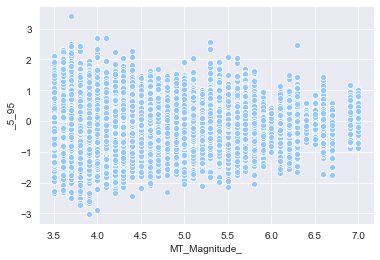

In [375]:
sns.scatterplot(calc['MT_Magnitude_'],calc['_5_95'])

In [376]:
a=[]
for i in np.arange(3.5,7.5,0.5):
    b=calc[(calc.MT_Magnitude_ >= i ) & (calc.MT_Magnitude_ <=i+0.5)]._5_95.mean()
    a.append(b)
    
a=np.array(a)
a

array([-0.01407217, -0.03265826, -0.04398461, -0.08669146, -0.11444901,
       -0.09684195, -0.06107563, -0.02763526])

In [377]:
from numpy import arange
c=[]
for i in arange(3.5,7.5,0.5):
    c.append(i)

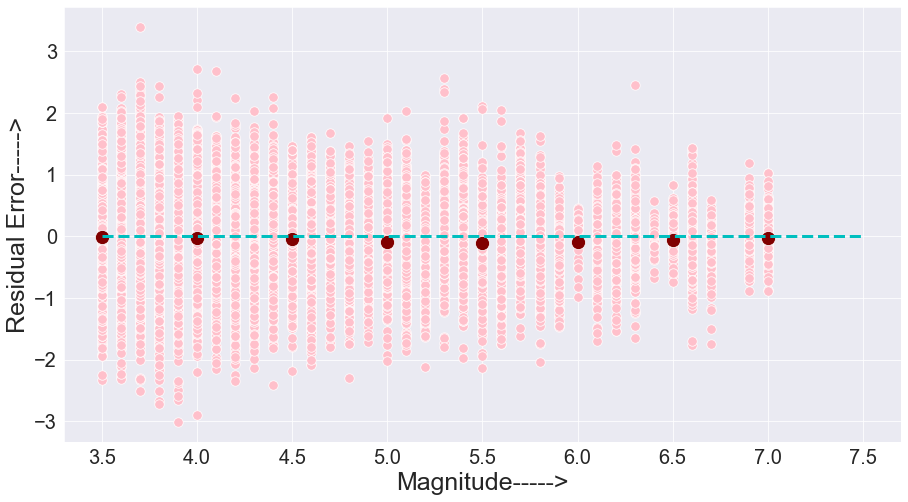

In [378]:
x=input_var['MT_Magnitude_']
y=residual['_5_95']
plt.figure(figsize=(15,8))
plt.hlines(y=0,xmin=3.5, xmax=7.5,color='c',linestyle='--',lw=3)
#sns.scatterplot(d,a, marker='o', color='red',s=200)
sns.scatterplot(x,y, marker='o', color='pink', s=90)
sns.scatterplot(c,a, marker='o',s=200,color= 'maroon')
plt.ylabel('Residual Error----->', size=25)
plt.xlabel('Magnitude----->', size=25)
#plt.xlim(0,150)
plt.tick_params(axis='both', which='major', labelsize=20)

In [379]:
df['MT_Magnitude_'].min()

3.5

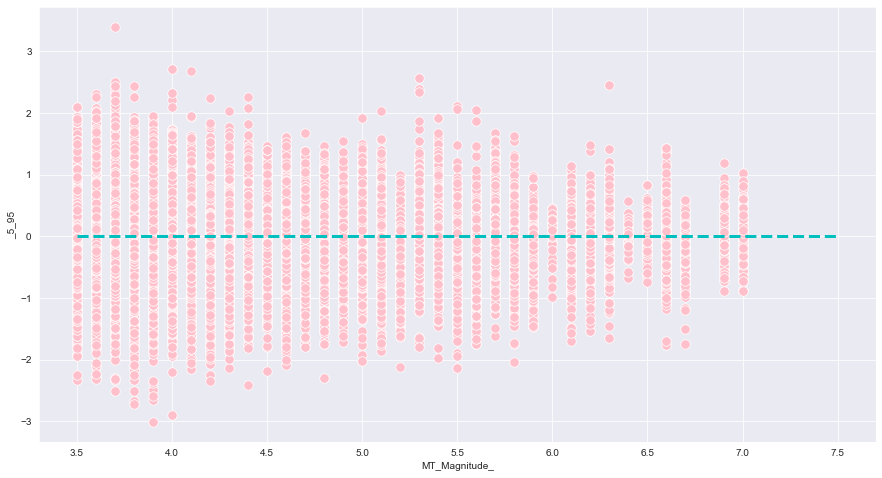

In [380]:
x=input_var['MT_Magnitude_']
y=residual['_5_95']
plt.figure(figsize=(15,8))
plt.hlines(y=0,xmin=3.5, xmax=7.5,color='c',linestyle='--',lw=3)
#sns.scatterplot(d,a, marker='o', color='red',s=200)
sns.scatterplot(x,y, marker='o', color='pink', s=90)